In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 회귀

## 경사 하강법

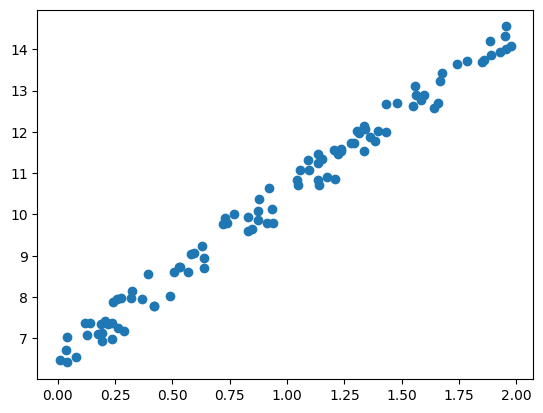

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

plt.scatter(X, y)

In [3]:
def get_cost(y, y_pred):
  return np.sum(np.square(y - y_pred)) / len(y)

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  w0_factors = np.ones((N, 1))

  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [5]:
def gradient_descent_steps(X, y, iters=10000):
  w0, w1 = np.zeros((1, 1)), np.zeros((1, 1))

  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1: {w1[0, 0]:.3f}, w0: {w0[0, 0]:.3f}')
y_pred = w1[0, 0] * X + w0
print(f'Gradient Descent Total Cost: {get_cost(y, y_pred)}')

w1: 4.028, w0: 6.490
Gradient Descent Total Cost: 0.07754792006806614


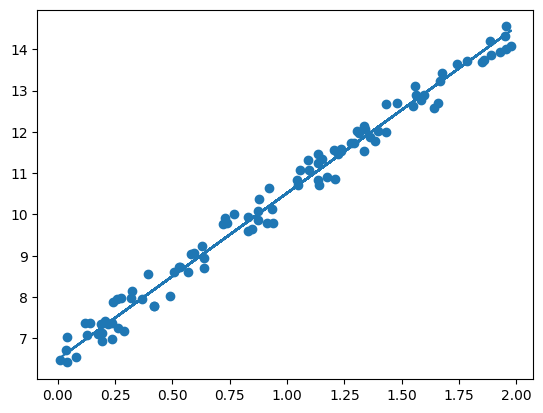

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

- 경사 하강법은 시간이 오래 걸린다는 단점이 있음
- 그래서 실전에서는 (미니 배치) 확률적 경사 하강법을 이용함
- 대용량 데이터에 대해 일부 데이터만 이용해 경사 하강법을 수행하는것을 의미

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0, w1 = np.zeros((1, 1)), np.zeros((1, 1))

  for ind in range(iters):
    # random sampling
    np.random.seed(ind)
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print(f'w1: {w1[0, 0]:.3f}, w0: {w0[0, 0]:.3f}')
y_pred = w1[0, 0] * X + w0
print(f'Stochastic Gradient Descent Total Cost: {get_cost(y, y_pred)}')

w1: 4.031, w0: 6.486
Stochastic Gradient Descent Total Cost: 0.07771709870768694


### LinearRegression을 이용한 보스턴 주택 가격 회귀 구현

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 보스턴 주택 가격 데이터가 인종차별 이슈로 더이상 사이킷런에서 지원하지 않으므로 따로 데이터를 로드함.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostondf = pd.DataFrame(boston, columns=columns)
bostondf['PRICE'] = target
print('Boston Data 크기: ', bostondf.shape)
bostondf.head()

Boston Data 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


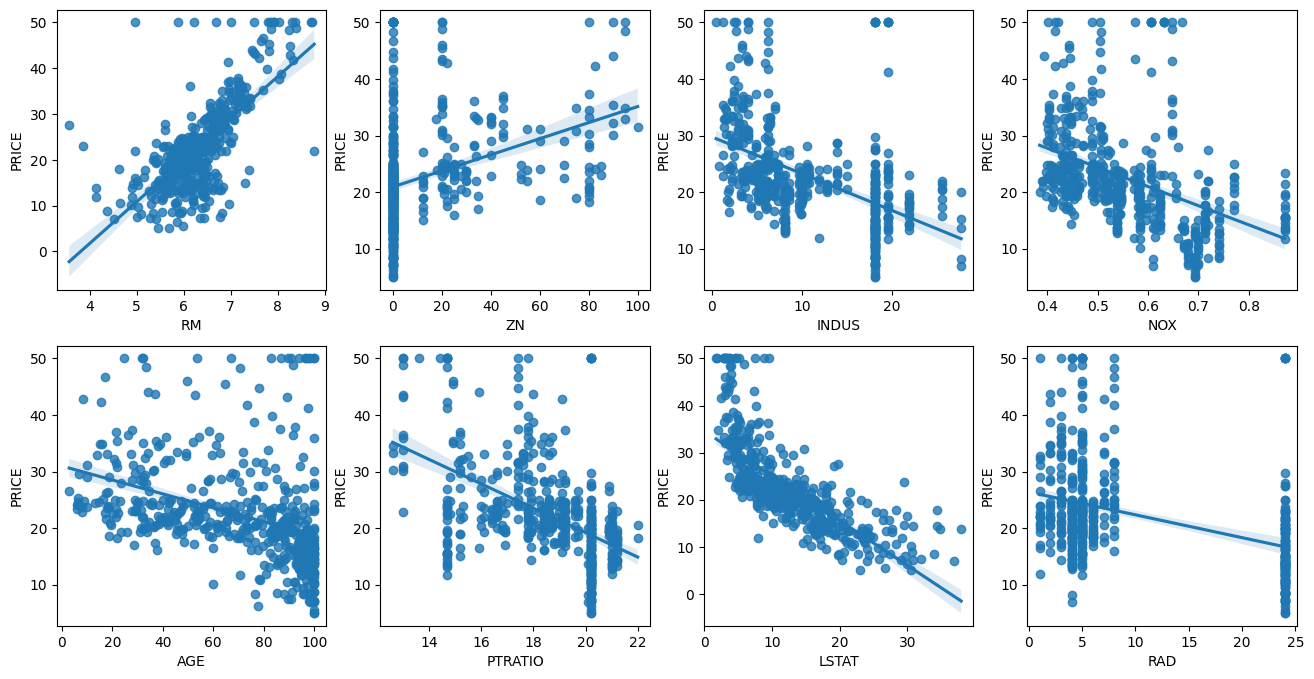

In [11]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i % 4
  sns.regplot(x=feature, y='PRICE', data=bostondf, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostondf['PRICE']
X_data = bostondf.drop('PRICE', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}')
print(f'Variance score: {r2_score(y_test, y_preds)}')

MSE: 17.2969, RMSE: 4.1590
Variance score: 0.7572263323138948


In [13]:
print(f'절편 값: {lr.intercept_}')
print(f'coefficients: {np.round(lr.coef_, 1)}')

절편 값: 40.995595172164826
coefficients: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# 회귀 계수 확인
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
# cross_val_score() 이용해 MSE, RMSE 측정
from sklearn.model_selection import cross_val_score
y_target = bostondf['PRICE']
X_data = bostondf.drop('PRICE', axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'개별 Negative MSE: {np.round(neg_mse_scores, 2)}')
print(f'개별 RMSE: {np.round(rmse_scores, 2)}')
print(f'평균 RMSE: {avg_rmse:.3f}')

개별 Negative MSE: [-12.46 -26.05 -33.07 -80.76 -33.31]
개별 RMSE: [3.53 5.1  5.75 8.99 5.77]
평균 RMSE: 5.829


## 다항 회귀

In [16]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2, 2)
print(f'단항식 피처:\n{X}')

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(f'다항식 피쳐:\n{poly_ftr}')

단항식 피처:
[[0 1]
 [2 3]]
다항식 피쳐:
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

X = np.arange(4).reshape(2, 2)
print(f'단항식 feature: \n{X}')
y = polynomial_func(X)
print(f'3차 다항식 결정값: \n{y}')

단항식 feature: 
[[0 1]
 [2 3]]
3차 다항식 결정값: 
[  5 125]


In [18]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(f'3차 다항식 계수 feature: \n{poly_ftr}')

model = LinearRegression()
model.fit(poly_ftr, y)
print('계수: ', np.round(model.coef_, 2))
print('회귀 shape: ', model.coef_.shape)

3차 다항식 계수 feature: 
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
계수:  [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
회귀 shape:  (10,)


In [19]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('회귀 계수:\n')
print(np.round(model.named_steps['linear'].coef_, 2))

회귀 계수:

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀에서의 과소적합 및 과적합

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
  return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
# y : true_fun(X) + noise
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree: 1, coefficients: [-1.61]

Degree: 1, MSE: 0.4077289625098685

Degree: 4, coefficients: [  0.47 -17.79  23.59  -7.26]

Degree: 4, MSE: 0.04320874987232064

Degree: 15, coefficients: [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]

Degree: 15, MSE: 181238256.56423894


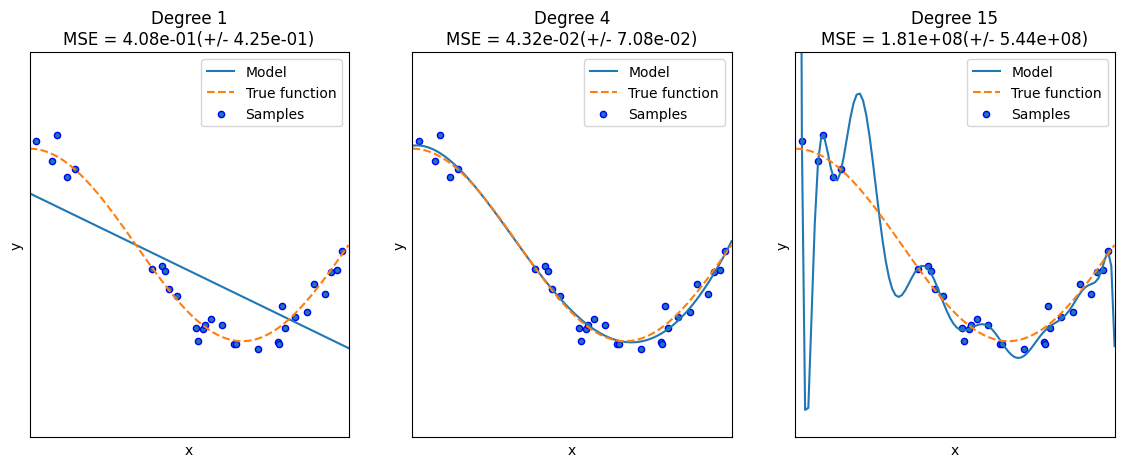

In [21]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]
for i in range(len(degrees)):
  # (1, 3) shape 중에서 i + 1번째 위치에 subplot 생성
  ax = plt.subplot(1, len(degrees), i + 1)
  # plot setting
  plt.setp(ax, xticks=(), yticks=())

  #polynomial transformation
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline(
    [
      ('polynomial_features', polynomial_features),
      ('linear_regression', linear_regression)
    ]
  )
  pipeline.fit(X.reshape(-1, 1), y)

  # cross validation
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
  # coefficients
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print(f'\nDegree: {degrees[i]}, coefficients: {np.round(coefficients, 2)}')
  print(f'\nDegree: {degrees[i]}, MSE: {-1 * np.mean(scores)}')

  # predict line
  X_test = np.linspace(0, 1, 100)
  # newaxis: dimension을 늘려줌
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

  # real function line
  plt.plot(X_test, true_fun(X_test), '--', label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc='best')
  plt.title(f'Degree {degrees[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})')

plt.show()

## 규제 선형 모델 - Ridge, Lasso, Elastic Net

비용함수 목표 : $\text{Min}(\text{RSS}(W) + \alpha \parallel W\parallel _2^2)$

$\alpha$가 작아지면 학습 데이터 적합 개선, 커지면 과적합 개선 가능

### Ridge

- L2 규제라고 함.
- L2 Norm($\parallel W\parallel _2^2$)에 패널티를 부여하는 방식

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'개별 neg_mse: {np.round(neg_mse_scores, 2)}')
print(f'개별 rmse: {np.round(rmse_scores, 2)}')
print(f'평균 rmse: {avg_rmse:.3f}')

개별 neg_mse: [-11.42 -24.29 -28.14 -74.6  -28.52]
개별 rmse: [3.38 4.93 5.31 8.64 5.34]
평균 rmse: 5.518


In [23]:
# alpha 값을 조정
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print(f'alpha = {alpha: 5}일 때 rmse: {avg_rmse:.3f}')

alpha =     0일 때 rmse: 5.829
alpha =   0.1일 때 rmse: 5.788
alpha =     1일 때 rmse: 5.653
alpha =    10일 때 rmse: 5.518
alpha =   100일 때 rmse: 5.330


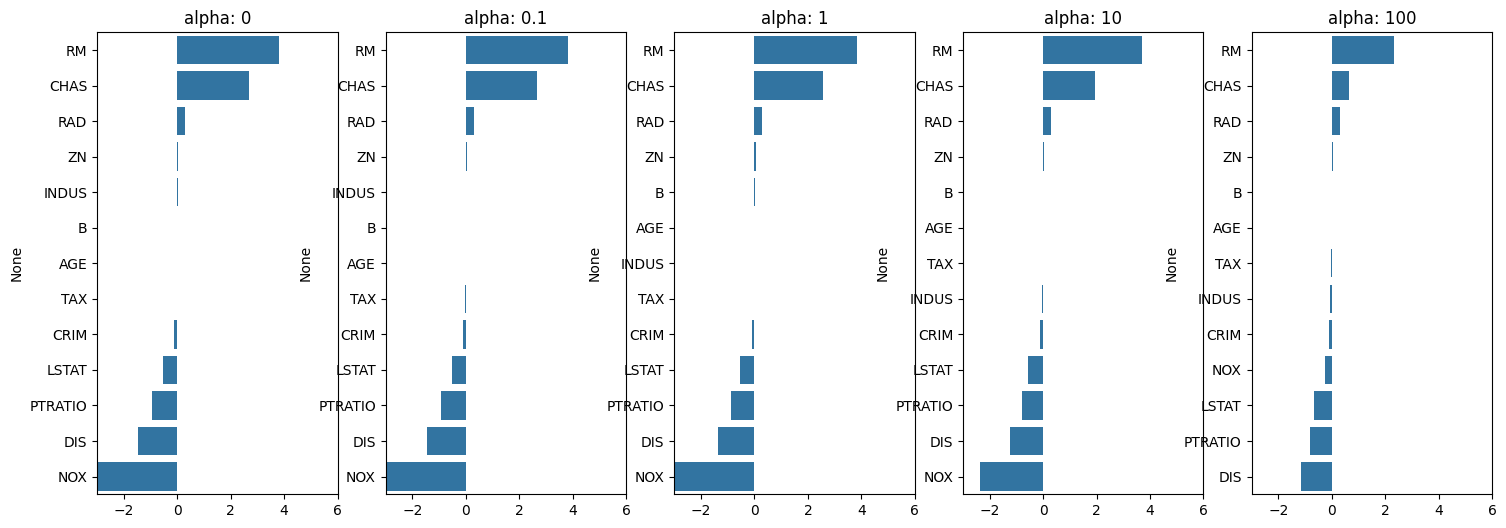

In [24]:
# visualization
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)

  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = f'alpha: {alpha}'
  coeff_df[colname] = coeff

  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [25]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: ' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### Lasso
- L1 규제를 적용함.
- 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만듦.
- feature selection의 성격을 띰.

In [26]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값 변화시키면서 모델 수행하는 함수 정의
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
  coeff_df = pd.DataFrame()
  if verbose: print('#######', model_name, '#######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n,
                                     y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {param}일 때 평균 RMSE: {avg_rmse:.3f}')

    # cross_val_score은 metric만 반환. coeffieient 추출을 위해 다시 fit
    model.fit(X_data_n, y_target_n)
    if return_coeff:
      coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
      colname = 'alpha: ' + str(param)
      coeff_df[colname] = coeff


  return coeff_df

In [27]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha: 0.07일 때 평균 RMSE: 5.612
alpha: 0.1일 때 평균 RMSE: 5.615
alpha: 0.5일 때 평균 RMSE: 5.669
alpha: 1일 때 평균 RMSE: 5.776
alpha: 3일 때 평균 RMSE: 6.189


In [28]:
sort_column = 'alpha: ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [29]:
# ElasticNet (alpha: a, l1_ratio: a / (a + b), l1규제의 비중)
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                       X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha: 0.07일 때 평균 RMSE: 5.542
alpha: 0.1일 때 평균 RMSE: 5.526
alpha: 0.5일 때 평균 RMSE: 5.467
alpha: 1일 때 평균 RMSE: 5.597
alpha: 3일 때 평균 RMSE: 6.068


In [30]:
sort_column = 'alpha: ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환
1. StandardScaler: 표준화, MinMaxScaler: 스케일링 -> 성능 향상 크게 안됨
2. 스케일링, 정규화를 한 데이터 세트에 다항 특성을 다시 적용함 -> 피처의 개수가 매우 많을 경우 과적합의 문제가 발생함
3. Log Transformation

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree,
                                     include_bias=False).fit_transform(scaled_data)
  return scaled_data

In [32]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                  ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                  input_data=X_data)
  print(f'\n## 변환 유형: {scale_method[0]}, Polynomial Degree: {scale_method[1]}')
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data, y_target_n=y_target,
                      verbose=False, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
alpha: 0.1일 때 평균 RMSE: 5.788
alpha: 1일 때 평균 RMSE: 5.653
alpha: 10일 때 평균 RMSE: 5.518
alpha: 100일 때 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha: 0.1일 때 평균 RMSE: 5.788
alpha: 1일 때 평균 RMSE: 5.653
alpha: 10일 때 평균 RMSE: 5.518
alpha: 100일 때 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: 2
alpha: 0.1일 때 평균 RMSE: 5.788
alpha: 1일 때 평균 RMSE: 5.653
alpha: 10일 때 평균 RMSE: 5.518
alpha: 100일 때 평균 RMSE: 5.330

## 변환 유형: MinMax, Polynomial Degree: None
alpha: 0.1일 때 평균 RMSE: 5.788
alpha: 1일 때 평균 RMSE: 5.653
alpha: 10일 때 평균 RMSE: 5.518
alpha: 100일 때 평균 RMSE: 5.330

## 변환 유형: MinMax, Polynomial Degree: 2
alpha: 0.1일 때 평균 RMSE: 5.788
alpha: 1일 때 평균 RMSE: 5.653
alpha: 10일 때 평균 RMSE: 5.518
alpha: 100일 때 평균 RMSE: 5.330

## 변환 유형: Log, Polynomial Degree: None
alpha: 0.1일 때 평균 RMSE: 5.788
alpha: 1일 때 평균 RMSE: 5.653
alpha: 10일 때 평균 RMSE: 5.518
alpha: 100일 때 평균 RMSE: 5.330


## 로지스틱 회귀
LogisticRegression 'solver' 파라미터
- lbfgs: 0.22~ 버전의 default option. 메모리 절약 & 병렬 최적화
- liblinear: ~0.21 버전의 default option. 다차원, 작은 데이터세트에서 효과적 but local minimum 이슈 & 병렬 최적화 불가
- newton-cg: 정교한 최적화 but 대용량 데이터에서 속도 느림
- sag: Stochastic Average Gradient. 경사하강법 기반. 대용량 데이터에서 빠르게 최적화
- saga: sag와 비슷. L1 정규화 가능

In [33]:
# 위스콘신 유방암 데이터 이용

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Logistic Regression
# solver=lbfgs (default)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, lr_preds):.4f}, roc_auc: {roc_auc_score(y_test, lr_preds):.4f}')

accuracy: 0.9766, roc_auc: 0.9716


In [36]:
# solver 비교
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
  lr_clf = LogisticRegression(solver=solver, max_iter=600)
  lr_clf.fit(X_train, y_train)
  lr_preds = lr_clf.predict(X_test)

  print(f'solver: {solver}, accuracy: {accuracy_score(y_test, lr_preds):.4f}, roc_auc: {roc_auc_score(y_test, lr_preds):.4f}')

solver: lbfgs, accuracy: 0.9766, roc_auc: 0.9716
solver: liblinear, accuracy: 0.9825, roc_auc: 0.9795
solver: newton-cg, accuracy: 0.9766, roc_auc: 0.9716
solver: sag, accuracy: 0.9825, roc_auc: 0.9795
solver: saga, accuracy: 0.9825, roc_auc: 0.9795


In [37]:
# LogisticRegression parameters
# panalty: regularization method. 'l2' is default
# C: 1 / alpha

from sklearn.model_selection import GridSearchCV

params = {
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 5, 10]
}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'best hyperparameter: {grid_clf.best_params_}\naverage accuracy: {grid_clf.best_score_:.4f}')

best hyperparameter: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
average accuracy: 0.9789


## 회귀 트리

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostondf = pd.DataFrame(boston, columns=columns)
bostondf['PRICE'] = target
print('Boston Data 크기: ', bostondf.shape)
bostondf.head()

Boston Data 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
y_target = bostondf['PRICE']
X_data = bostondf.drop('PRICE', axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('Negative MSE scores:', np.round(neg_mse_scores, 2))
print('RMSE scores:', np.round(rmse_scores, 2))
print(f'Average RMSE: {avg_rmse:.2f}')

Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
RMSE scores: [2.81 3.63 4.54 6.8  4.34]
Average RMSE: 4.42


In [40]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####', model.__class__.__name__, '#####')
  print(f'Average RMSE: {avg_rmse:.3f}')

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgbm_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
Average RMSE: 5.978
##### RandomForestRegressor #####
Average RMSE: 4.423
##### GradientBoostingRegressor #####
Average RMSE: 4.269
##### XGBRegressor #####
Average RMSE: 4.959
##### LGBMRegressor #####
Average RMSE: 4.646


<Axes: xlabel='None', ylabel='None'>

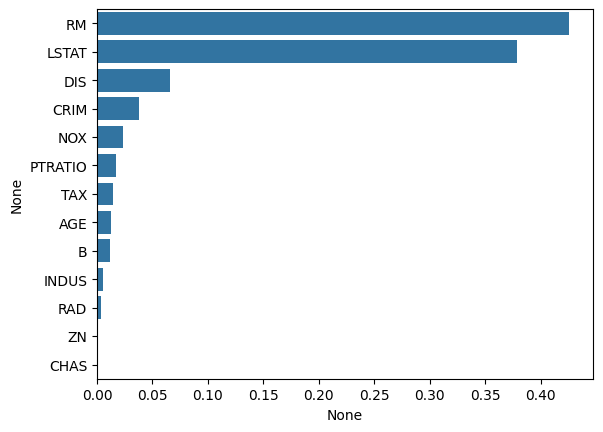

In [42]:
# 회귀트리는 coef_가 없는 대신 feature_importances_를 이용해 피처별 중요도를 확인 가능함.

import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


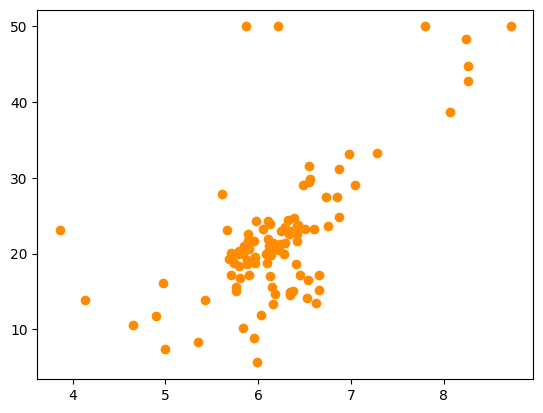

In [43]:
# 직관적 시각화
bostondf_sample = bostondf[['RM', 'PRICE']]
bostondf_sample = bostondf_sample.sample(n=100, random_state=0)
print(bostondf_sample.shape)
plt.figure()
plt.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = bostondf_sample['RM'].values.reshape(-1, 1)
y_target = bostondf_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

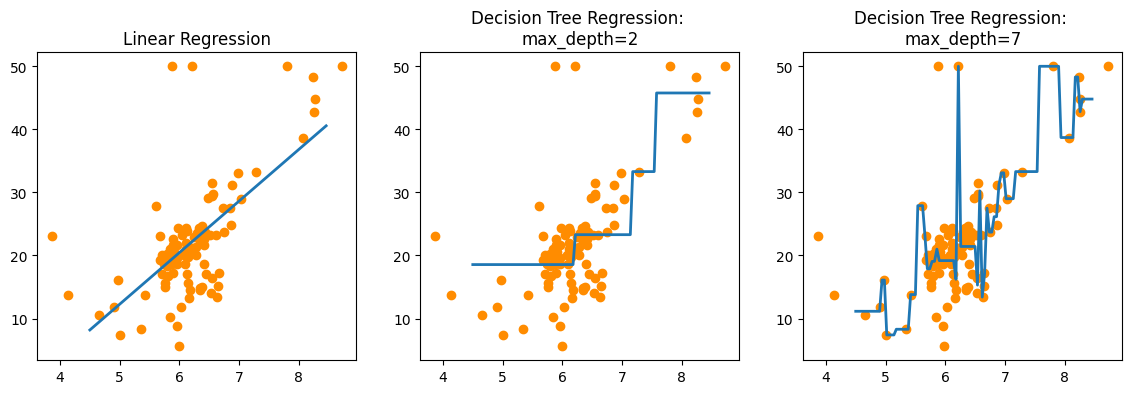

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \nmax_depth=2')
ax2.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_dt2, label='max_depth:2', linewidth=2)

ax3.set_title('Decision Tree Regression: \nmax_depth=7')
ax3.scatter(bostondf_sample.RM, bostondf_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_dt7, label='max_depth:7', linewidth=2)

## 회귀 실습 - 자전거 대여 수요 예측

데이터 세트: https://www.kaggle.com/c/bike-sharing-demand/data

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand/bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 데이터 전처리 및 시각화

In [48]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


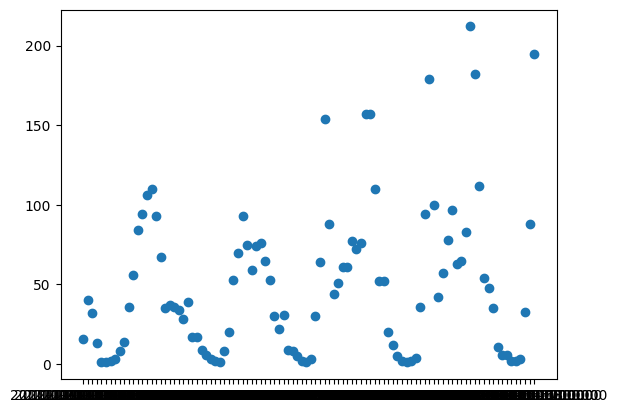

In [49]:
plt.scatter(bike_df['datetime'][:100], bike_df['count'][:100])

In [50]:
# 문자열을 datetime type으로 변환
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [51]:
bike_df.drop(['casual', 'registered', 'datetime'], axis=1, inplace=True)

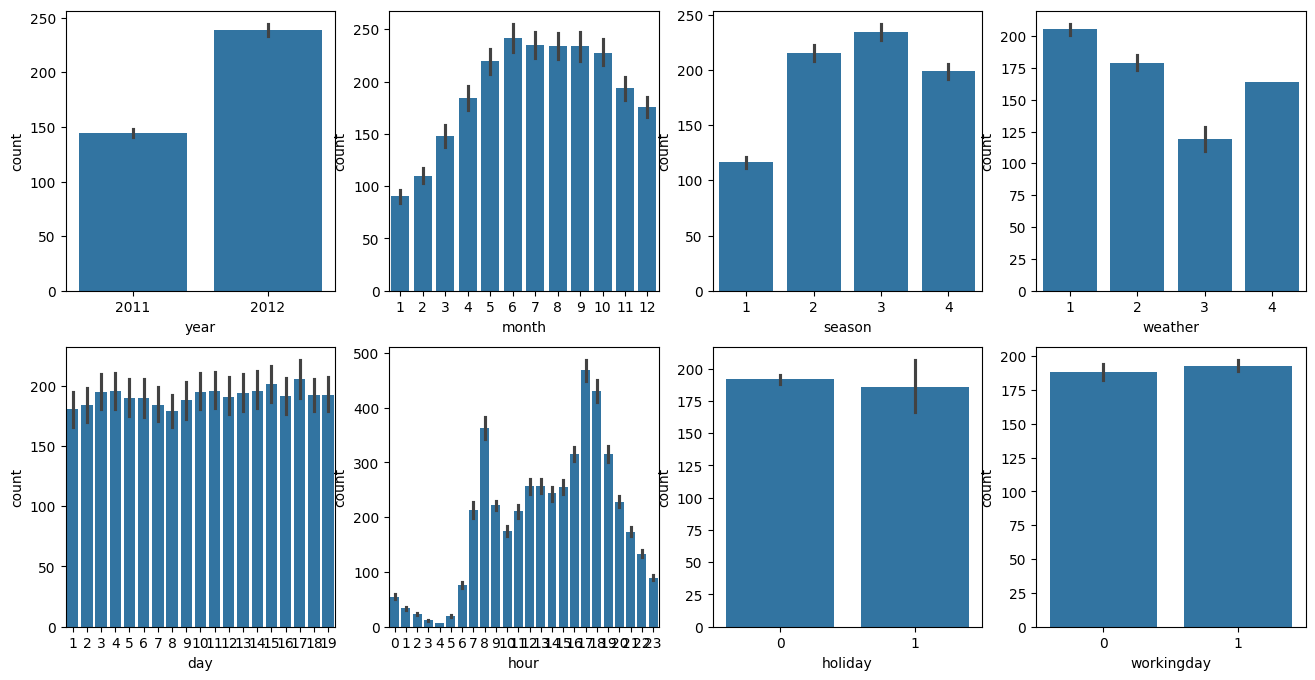

In [52]:
fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=4)

cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
for i, feature in enumerate(cat_features):
  row = int(i/4)
  col = i%4
  sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [53]:
# RMSLE(Root Mean Squared Log Error) 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred) ** 2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  mae_val = mean_absolute_error(y, pred)
  print(f'RMSLE: {rmsle_val:.3f}, RMSE: {rmse_val:.3f}, MAE: {mae_val:.3f}')

### 로그 변환, 피처 인코딩  및 모델 학습/예측/평가

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [55]:
def get_top_error_data(y_test, pred, n_tops=5):
  result_df = pd.DataFrame(y_test.values, columns=['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

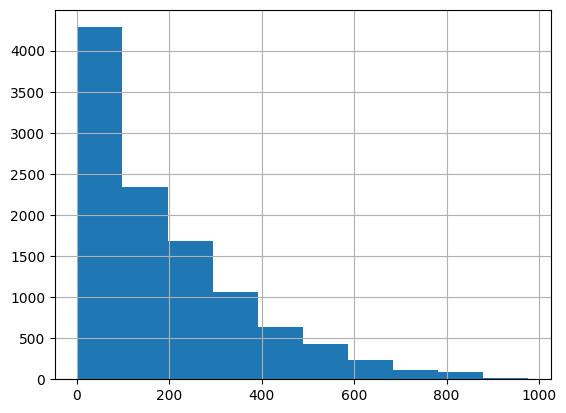

In [56]:
y_target.hist()

<Axes: >

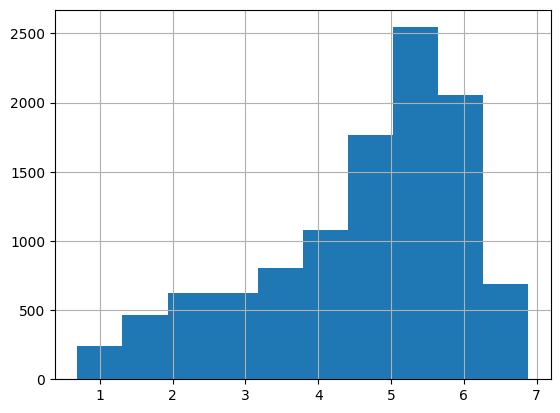

In [57]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [58]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# log1p 되돌리기
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: ylabel='None'>

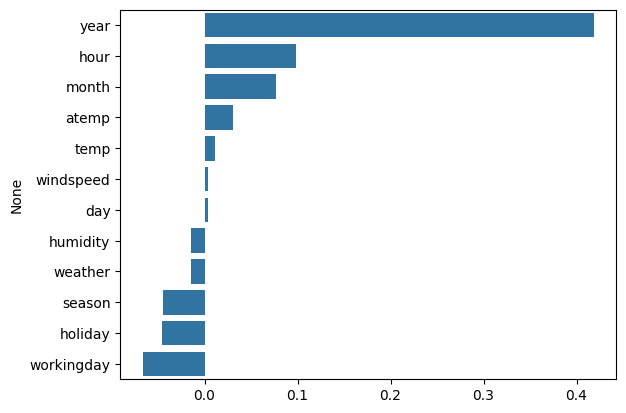

In [59]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [60]:
# one-hot encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1:
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###', model.__class__.__name__, '###')
  evaluate_regr(y_test, pred)


lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: ylabel='None'>

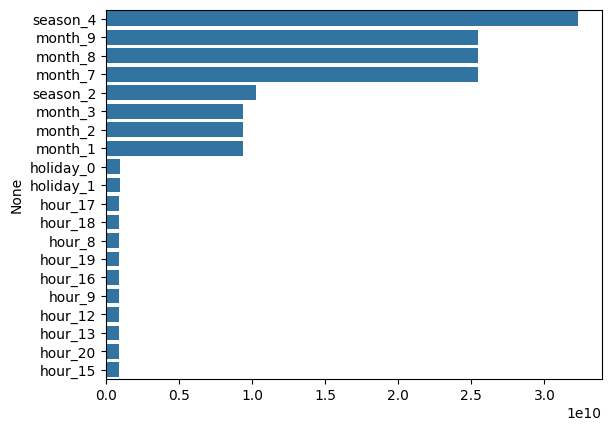

In [62]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  #XGBoost의 경우 DataFrame이 입력될 경우 오류 발생 가능, 따라서 ndarray로 입력
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.404, MAE: 31.242
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.339, MAE: 32.747
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE: 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


## 회귀 실습- 캐글 주택 가격: 고급 회귀 기법

데이터 세트: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/content/drive/MyDrive/House Prices - Advanced Regression Techniques/train.csv')
house_df = house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 데이터 전처리 및 인코딩

In [65]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
print('shape:', house_df.shape)
print('\ntype \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull columns and counts:\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

shape: (1460, 81)

type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null columns and counts:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


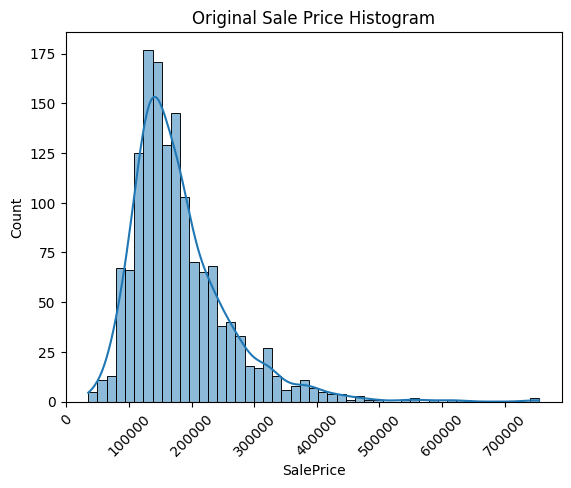

In [67]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

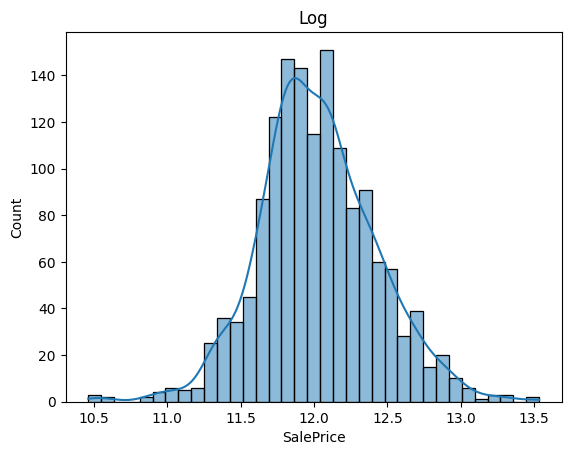

In [68]:
plt.title('Log')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [69]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

numeric_columns = house_df.select_dtypes(exclude=['object']).columns
house_df[numeric_columns] = house_df[numeric_columns].fillna(house_df[numeric_columns].mean())

null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null feature type:\n', house_df.dtypes[null_column_count.index])

## Null feature type:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [70]:
house_df_ohe = pd.get_dummies(house_df)
null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## NULL feature type :\n', house_df_ohe.dtypes[null_column_count.index])

## NULL feature type :
 Series([], dtype: object)


### 선형 회귀 모델 학습/예측/평가

In [71]:
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse, 3))
  return rmse


def get_rmses(models):
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.127
Lasso 로그 변환된 RMSE:  0.176


[0.13183184688250882, 0.1274058283626615, 0.17628250556471403]

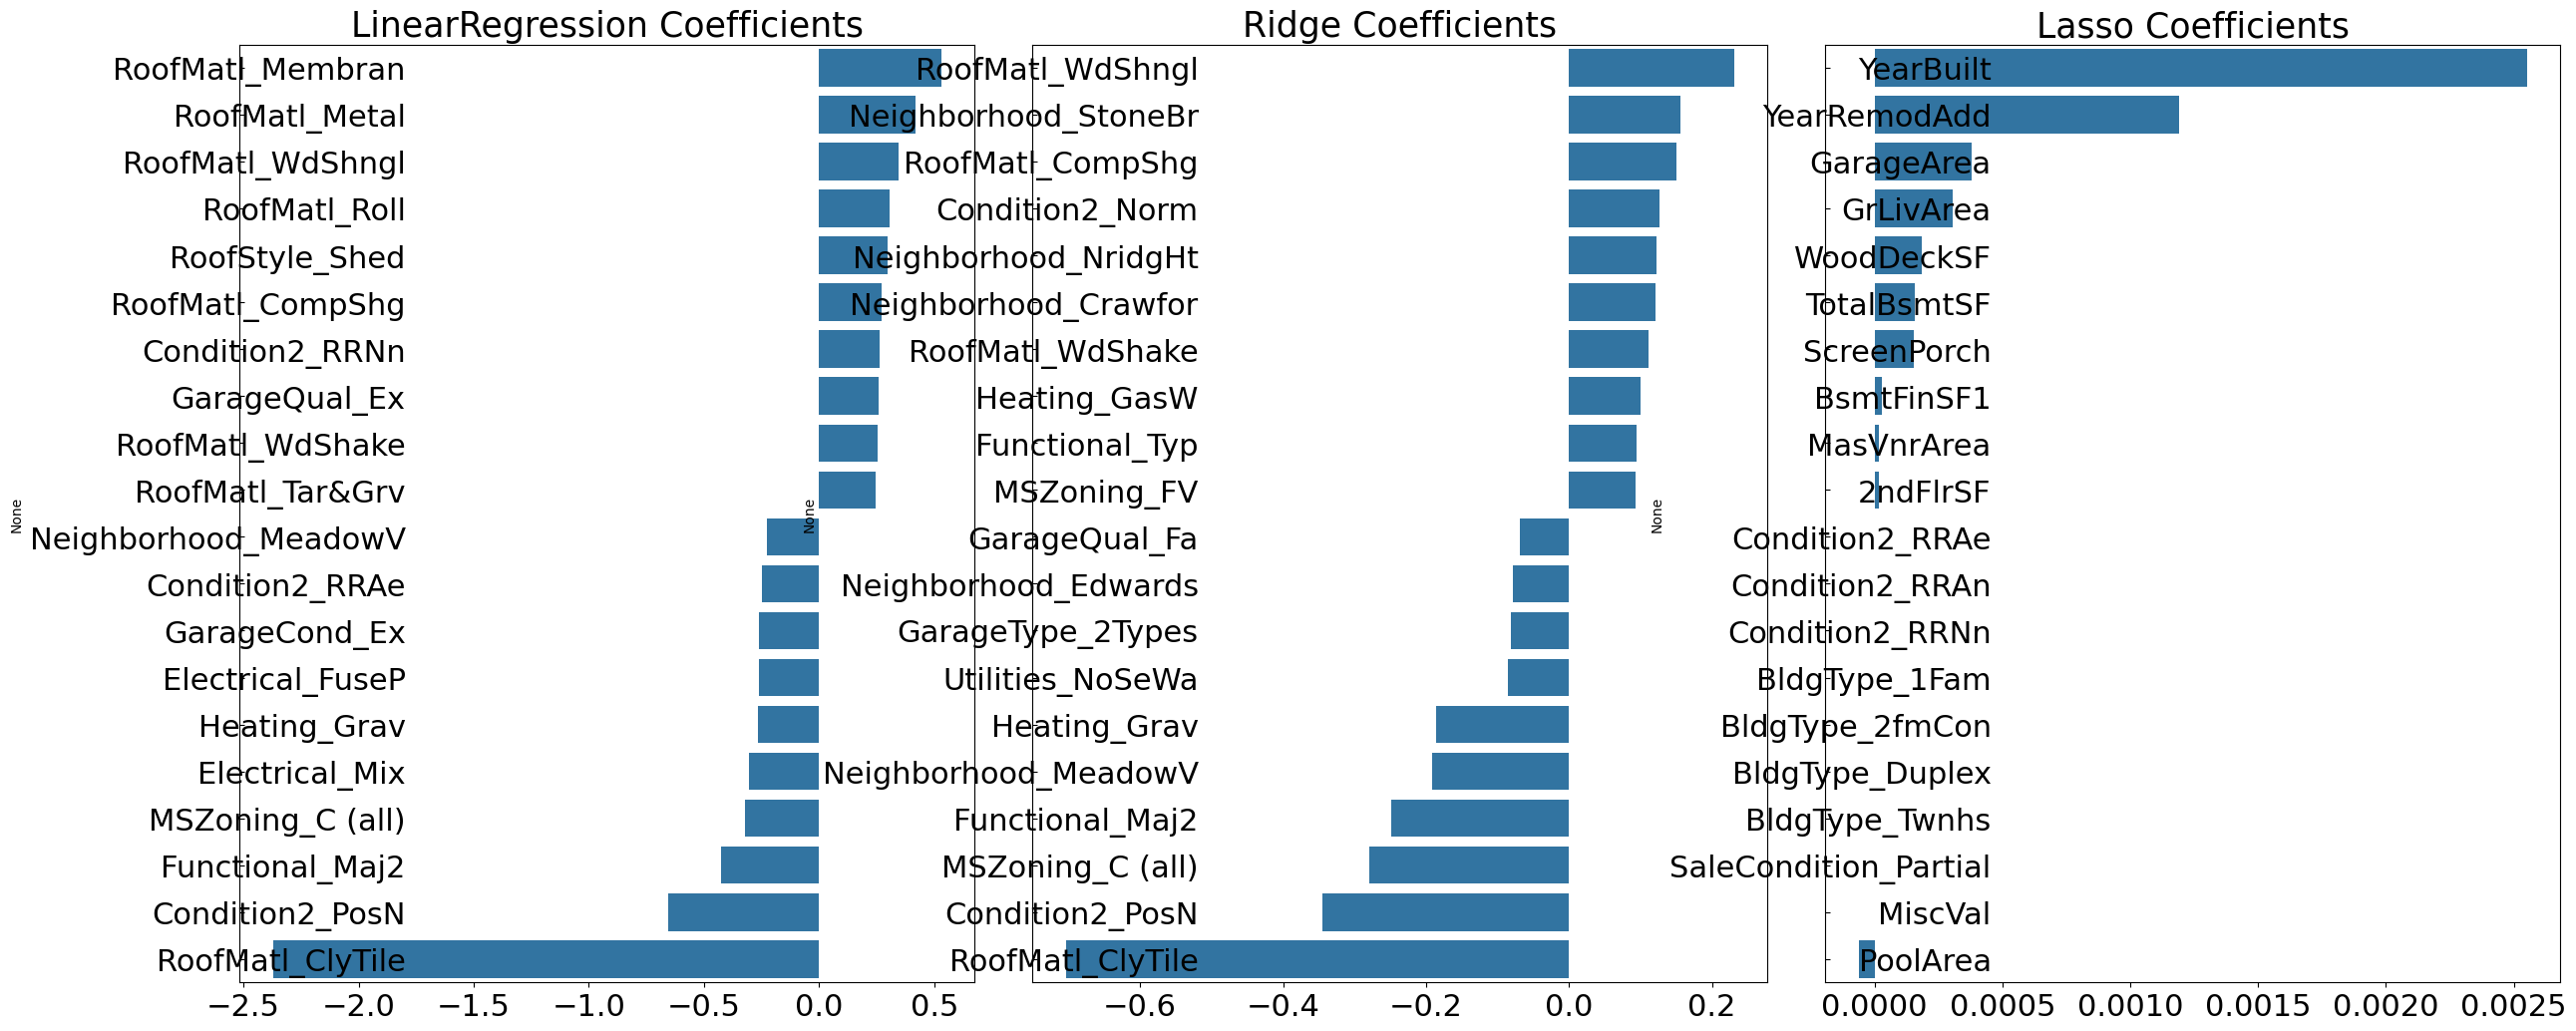

In [76]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        axs[i_num].set_title(model.__class__.__name__ + ' Coefficients', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


In [77]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 계산하기 위해 전체 데이터로 cross_val_score() 사용, 모델마다 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{} CV RMSE 값 리스트: {}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{} CV 평균 RMSE 값: {}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 여기에서 활용할 ridge_reg, lasso_reg 모델에 CV RMSE값 출력
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)



Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


In [78]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-grid_model.best_score_)
    print('{} CV 최적 평균 RMSE 값: {:.3f}, 최적 alpha:{}'.format(model.__class__.__name__,
                                                              rmse, grid_model.best_params_))

ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.3, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge CV 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 12}
Lasso CV 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.146


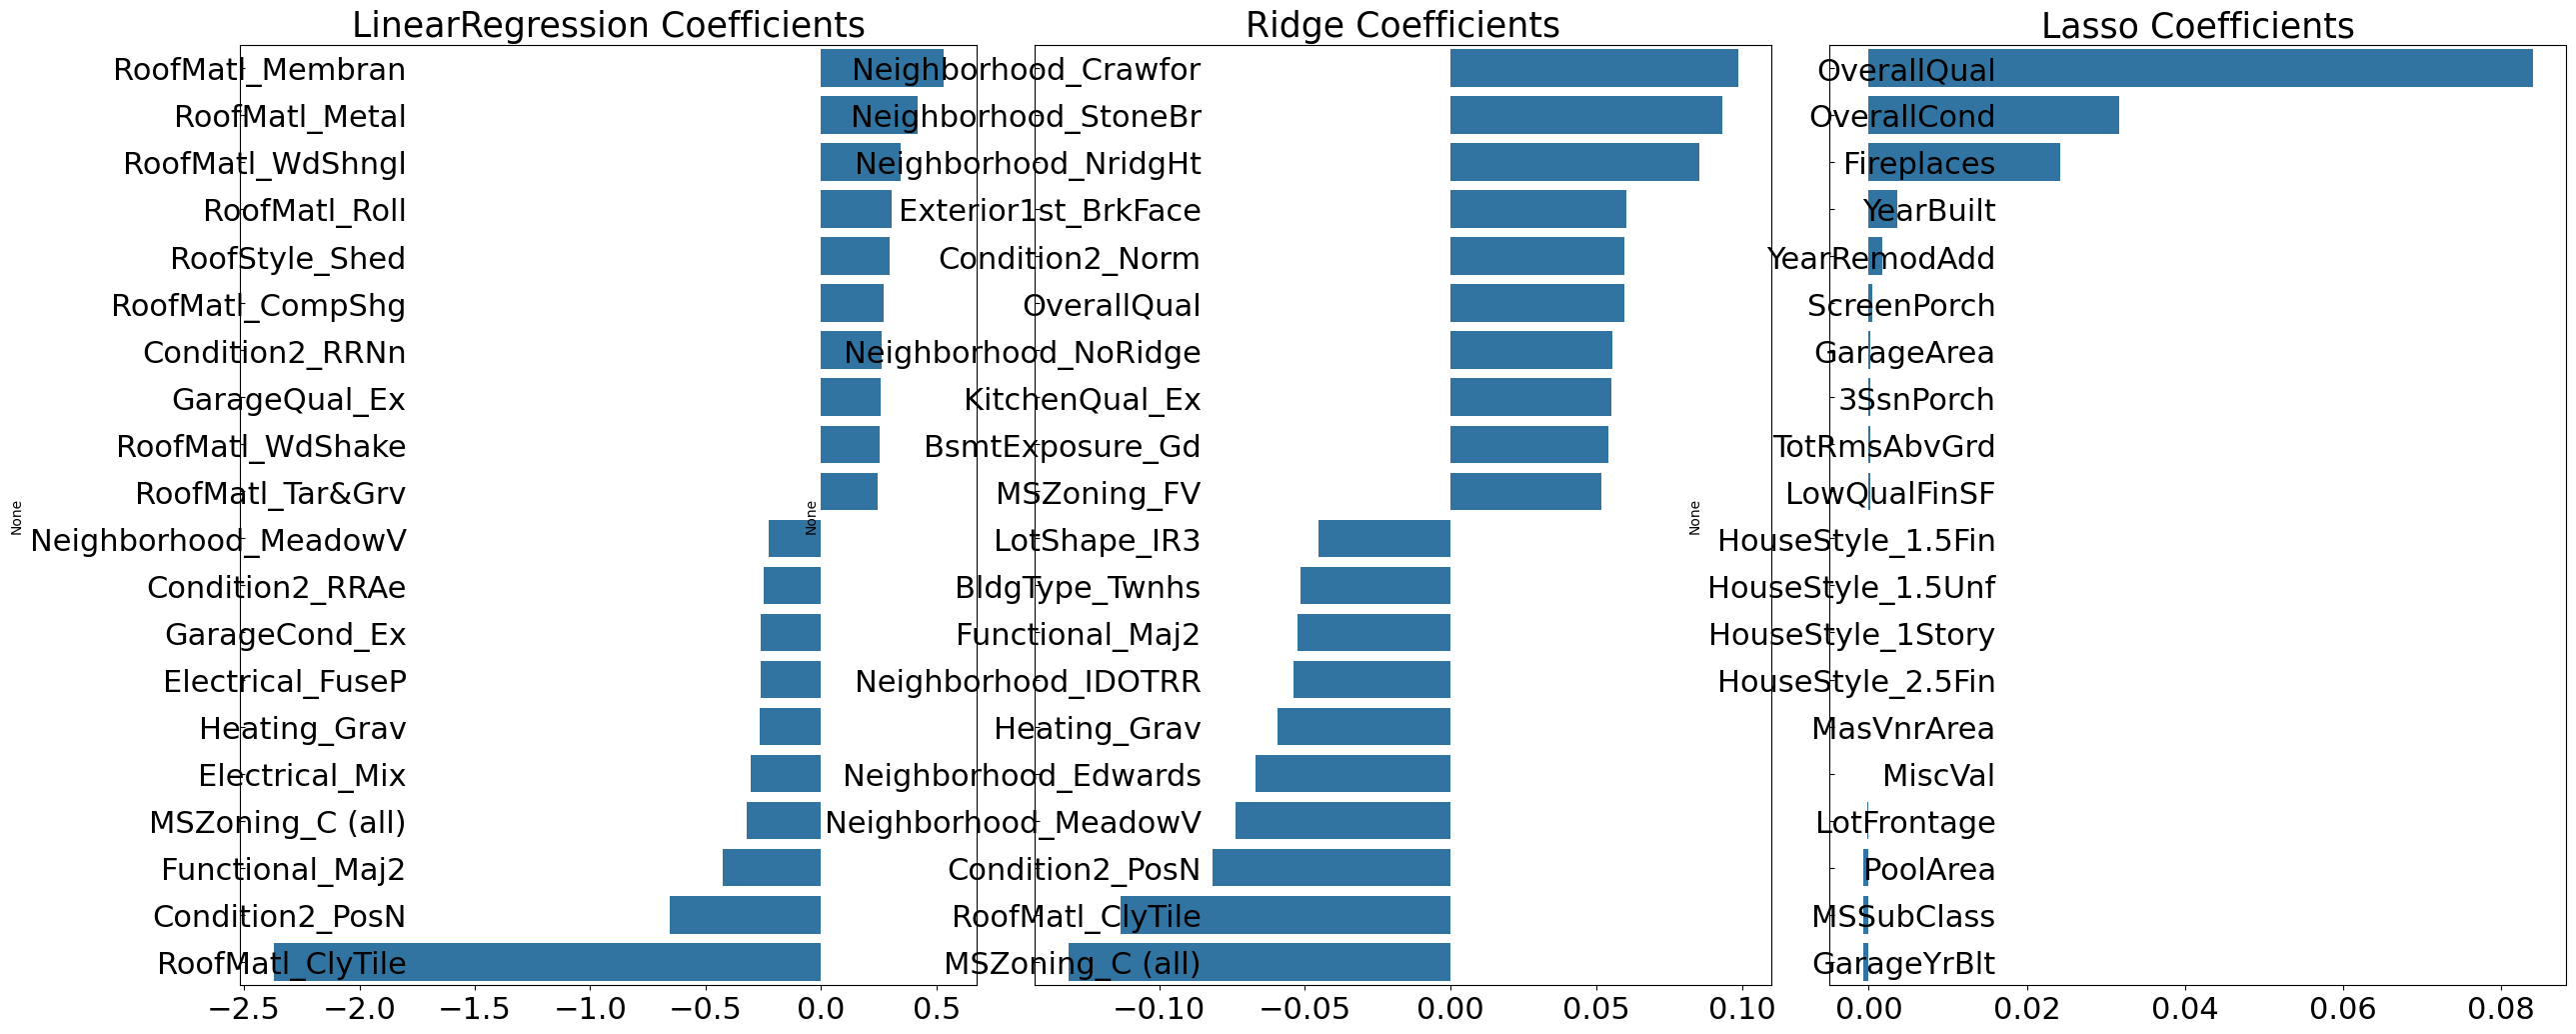

In [80]:
# 모델 초기화 및 학습
lr = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

lr.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 모든 모델 RMSE 출력
models = [lr, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 계수 시각화
models = [lr, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [81]:
from scipy.stats import skew

# object가 아닌 수치형 피처의 컬럼 index 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 각 컬럼 index를 []로 입력하여 해당하는 컬럼 데이터 셋을 받아. apply lambda x: skew(x) 함수 적용
skew_features = house_df[features_index].apply(lambda x: skew(x))

# skew(왜도) 정도가 1 이상인 컬럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 모델 피처 데이터를 더미 변수로 다시 만들어 모델 입력용 피처를 준비하고 파라미터 데이터 셋을 생성
house_df_oe = pd.get_dummies(house_df)

# 타겟 변수와 피처 데이터셋 분리
y_target = house_df_one['SalePrice']
features = house_df_one.drop('SalePrice', axis=1, inplace=False)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, y_target, test_size=0.2, random_state=156)

# 모델을 통해 모델에 대해 최적의 파라미터와 함께 모델의(RMSE) 측정
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.3, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge CV 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 12}
Lasso CV 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


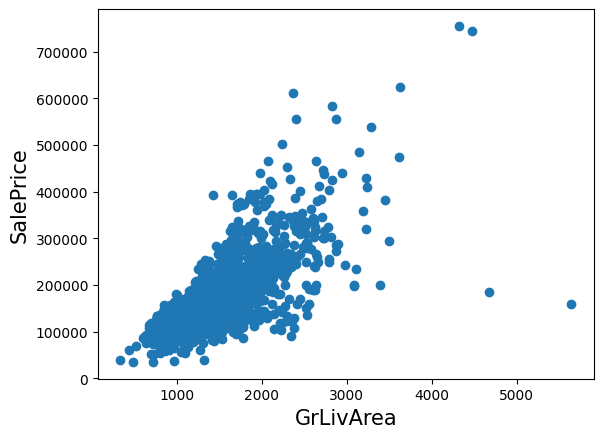

In [83]:
import matplotlib.pyplot as plt

# 산점도 그래프로 GrLivArea와 SalePrice 관계 시각화
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

In [85]:
import numpy as np

# GrLivArea와 SalePrice 모두 로그 변환으로 이상 값을 탐지할 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log10(4000)
cond2 = house_df_ohe['SalePrice'] < np.log10(500000)

# 조건을 만족하는 이상치 인덱스 추출
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 인덱스 :', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 제거
house_df_ohe.drop(outlier_index, axis=0, inplace=True)

print('이상치 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

이상치 인덱스 : []
이상치 삭제 전 house_df_ohe shape: (1460, 270)
이상치 삭제 후 house_df_ohe shape: (1460, 270)
